In [143]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [144]:
import numpy as np
import pandas as pd
import psycopg2

In [145]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [146]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [147]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [148]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

# Part 2 - Exploratory Climate Analysis

In [149]:
 
    
    
query = f'''
        SELECT 
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= (SELECT DATE(MAX(date),'-1 year') FROM measurement)
        ORDER BY
            date
'''
prcp_df=pd.read_sql(query,conn)
prcp_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [150]:
prcp_df = prcp_df.set_index('date')
prcp_df.sort_values('date')


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


Text(0, 0.5, 'Inches')

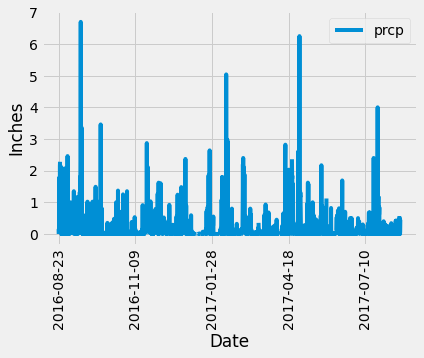

In [151]:
prcp_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")



In [155]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [85]:
# Design a query to show how many stations are available in this dataset?
station_freq = pd.read_sql('select station, COUNT(station) as frequency from station group by station order by frequency DESC', conn)
station_freq

,station,frequency
0,USC00519523,1
1,USC00519397,1
2,USC00519281,1
3,USC00518838,1
4,USC00517948,1
5,USC00516128,1
6,USC00514830,1
7,USC00513117,1
8,USC00511918,1


In [105]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query = '''
    select 
        count(*) as station_count
    from 
        station 
'''

station_df = pd.read_sql(query,conn)

station_count =station_df['station_count'].values[0]
station_count

9

In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = '''
select
  s.station as station_code, 
  s.name as station_name, 
  COUNT(*) as station_count
From 
    measurement m
    inner join station s
    on m.station=s.station
Group by
    s.station,
    s.name
ORDER BY
    station_count DESC
'''
active_stations_df=pd.read_sql(query,conn)
active_stations_df

,station_code,station_name,station_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [106]:
most_active_station = active_stations_df['station_code'].values[0]

In [107]:
query= f'''
    SELECT 
    min(tobs), 
    max(tobs), 
    avg(tobs) 
    FROM measurement 
    WHERE station='{most_active_station}'
'''
temps_obs_df=pd.read_sql(query,conn)
temps_obs_df

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


Text(0.5, 0, 'Temperature')

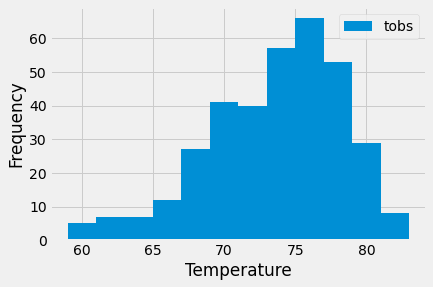

In [110]:
                 
query=f'''
    SELECT
    date, tobs
    FROM
    measurement
    WHERE
    date >= (SELECT DATE(MAX(date),'-1 year') FROM measurement)
    and station = '{most_active_station}'
'''

temps_obs_df=pd.read_sql(query,conn)  
temps_obs_df

temps_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature")


## Part 3 - Data Analysis Assignment

In [ ]:
##BONUS-- NOT NEEDED

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(start_date, end_date):
query= f'''
SELECT min(tobs), max(tobs), avg(tobs) 
from measurement 
where date between '{start_date}' and '{end_date}'
'''
temp_stats_df=pd.read_sql(query, conn)
temp_stats = tuple(temp_stats_df.values[0])
return temp_stats

print(calc_temps('2012-02-28', '2012-03-05'))

